Real-Time Emotion Detection Project

In [ ]:
import zipfile
import os

Upload Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ck+.zip to ck+.zip


Extract Dataset


In [ ]:
zip_file = 'ck+.zip'
unzip_dir = '/content/ckplus'  # Directory to unzip the content
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(unzip_dir)

Verify the extracted content

In [ ]:
os.listdir(unzip_dir)

['ckextended.csv']

In [ ]:
import pandas as pd

Load the CSV file

In [ ]:
csv_file = os.path.join(unzip_dir, 'ckextended.csv')
data = pd.read_csv(csv_file)

Check the first few rows of the data

In [ ]:
print(data.head())

   emotion                                             pixels     Usage
0        6  36 39 35 25 19 11 8 7 3 13 15 9 21 57 75 90 10...  Training
1        6  88 74 19 4 5 5 3 12 8 21 15 21 15 18 24 29 32 ...  Training
2        6  9 2 4 7 1 1 1 0 7 29 49 76 115 141 156 169 177...  Training
3        6  104 106 108 104 95 50 60 61 58 83 126 133 139 ...  Training
4        6  68 72 67 67 6 2 1 1 1 1 1 14 24 24 38 65 79 94...  Training


Start to preprocess the data and importing libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import img_to_array

Extract 'emotion' and 'pixels' columns

In [ ]:
labels = data['emotion'].values
pixels = data['pixels'].values

Preprocess pixel values

In [ ]:
def preprocess_pixels(pixels):
    # Assuming pixels are in the form of a string of pixel values
    pixels_array = np.array([np.fromstring(pixel_string, sep=' ').reshape(48, 48) for pixel_string in pixels])
    pixels_array = pixels_array.astype('float32') / 255.0  # Normalize pixel values
    return pixels_array

In [ ]:

pixels_array = preprocess_pixels(pixels)

Split data into training and test sets


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(pixels_array, labels, test_size=0.2, random_state=42)

Check random images

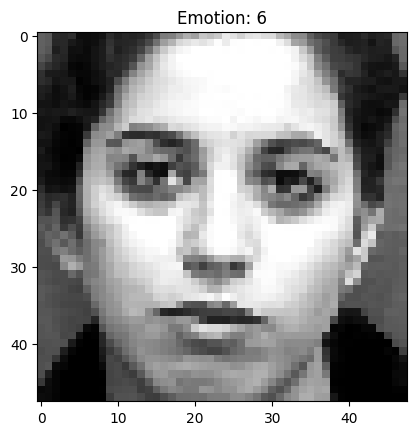

In [ ]:
index = np.random.randint(0, len(X_train))
plt.imshow(X_train[index], cmap='gray')
plt.title(f'Emotion: {y_train[index]}')
plt.show()

Assign numbers to classes

In [ ]:
emotion_dict = {
    0: 'Anger',
    1: 'Contempt',
    2: 'Disgust',
    3: 'Fear',
    4: 'Happiness',
    5: 'Sadness',
    6: 'Surprise'
}


Build a CNN model

In [ ]:
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical

# One-hot encode the labels
y_train_encoded = to_categorical(y_train, num_classes=8)
y_test_encoded = to_categorical(y_test, num_classes=8)

# Build the CNN model
model = models.Sequential([
    layers.Reshape((48, 48, 1), input_shape=(48, 48)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(8, activation='softmax')
])





/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Print Summary of model

In [ ]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ reshape (Reshape)                    │ (None, 48, 48, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 46, 46, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 21, 21, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │           1,032 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 355,976 (1.36 MB)

 Trainable params: 355,976 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

Compiling Model

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Train model

In [ ]:
history = model.fit(X_train, y_train_encoded, epochs=50, batch_size=32, validation_data=(X_test, y_test_encoded))


Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 1.0000 - loss: 2.4070e-05 - val_accuracy: 0.9022 - val_loss: 0.6932
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 2.5843e-05 - val_accuracy: 0.9022 - val_loss: 0.6892
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 2.5059e-05 - val_accuracy: 0.9022 - val_loss: 0.6886
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 2.3876e-05 - val_accuracy: 0.9022 - val_loss: 0.6943
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 2.9607e-05 - val_accuracy: 0.9022 - val_loss: 0.6883
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 2.4791e-05 - val_accuracy: 0.9022 - val_loss: 0.6907
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 2.5623e-05 - val_accuracy: 0.9022 - val_loss: 0.6963
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 1.0000 - loss: 2.2985e-05 - 

Test Model

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test_encoded)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8977 - loss: 0.7884 
Test Accuracy: 90.22%


Save model

In [ ]:
model.save('emotion_detection_model.h5')

Load Model

In [ ]:
from tensorflow.keras.models import load_model

# Load the model
model = load_model('emotion_detection_model.h5')